# INFO 3350/6350

## Lecture 11: Classification I

## To do

* HW 5 due **Friday**, 11:59pm
    * Max 3 slip days for this one
    * Note that slip day limits for each assignment are hard stops. Slip days *are* your flexibility for extceptional circumstances. No additional flexibility is possible.
* This week
    * Friday sections *do* meet
    * Read HDA, ch. 6 before next Monday
    * No discussion readings or response posts
* Next week (classification, cont.)
    * Monday: Read HDA, ch. 8 and "The curse(s) of dimensionality"
    * Wednesday: Read articles by Underwood and by Norvig
        * Response to Underwood or Norvig due by 4:00pm by next Tuesday, 3/8, if assigned to you by NetID.
    * Friday: Section as usual

## Repeat: Supervised and unsupervised learning

* "Clustering" is a type of *unsupervised* learning
* "Classification" is a type of *supervised* learning
* **Both seek to assign a finite set of labels to input objects on the basis of features associated with those objects**
* In *supervised* learning, you know the labels in advance
    * You supply a set of (correctly) labeled objects to the algorithm
    * The algorithm then "learns" which features are associated with which labels, so as to minimize classification errors
* In *unsupervised* learning, you don't know the labels (though you might know how many labels there should be)
    * You supply a feature matrix and a definition of what a "good" clustering (label set) should be
    * The algorithm then assigns labels to the input objects so as to best satisfy the supplied definition of "good" (typically, minimizing variance within clusters and maximizing difference between clusters)

## Repeat: Why prefer one or the other?

* **Unsupervised** methods are often used early in a project, when you're looking for unknown stucture in your data
    * Unsupervised methods are your only option if you don't know what the appropriate set of labels might be for your data set
    * Also appropriate if you don't have (many) labeled instances
    * Also appropriate when you know and care a lot about the features themselves rather than the classes
        * Clustering produces a set of labels that are most compatible with the features (as well as the distance metric and learning algorithm, of course) that you've supplied.
    * Unsupervised methods are typically "cheap" to set up, but costly to evaluate
* **Supervised** methods require you to know in advance the full set of appropriate labels for your data
    * Supervised methods often have high initial costs, but are easier to evaluate (because you already have a set of correctly labeled instances that you can use for validation).
    * Appropriate when you care more about the output labels than the features.
        * Weighs features such that you produce the set of labels closest to the training data.
        * No guarantee that the features on which the supervised method relies will be the ones that you believe are abstracty important.
        That said, it's possible to examine (directly) or to evaluate (indirectly) the importance of specific features in a trained supervised model. This can be interesting if you want to understand the features on which the model relies most heavily.

## Machine learning glossaries

If you're finding yourself confused by some of the volcabulary of machine learning, here are two useful glossaries that may help:

* [Google's machine learning glossary](https://developers.google.com/machine-learning/glossary). Very extensive, leans toward neural methods.
* [A shorter glossary](https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html) for quicker reference.

## Algorithms

### *k* Nearest Neighbors
* Assign to new objects the most common label among *k* nearest neighbors in the training set
* Very low computational cost, easy to understand and interpret, and can fit complex decision spaces with ease
* Not usually the best performance for real-world cases


### An artificial example

Let's try this with 3 synthetic blobs and then switch to 4 ...

**NB.** We use the `make_blobs` function to create synthetic data for purposes of illustration. This has no role in actual clustering on classification problems. Don't try to use `make_blobs` as part of your approach to learning from real data.

kNN score (uniform density): 0.993
kNN score (varied density): 0.853


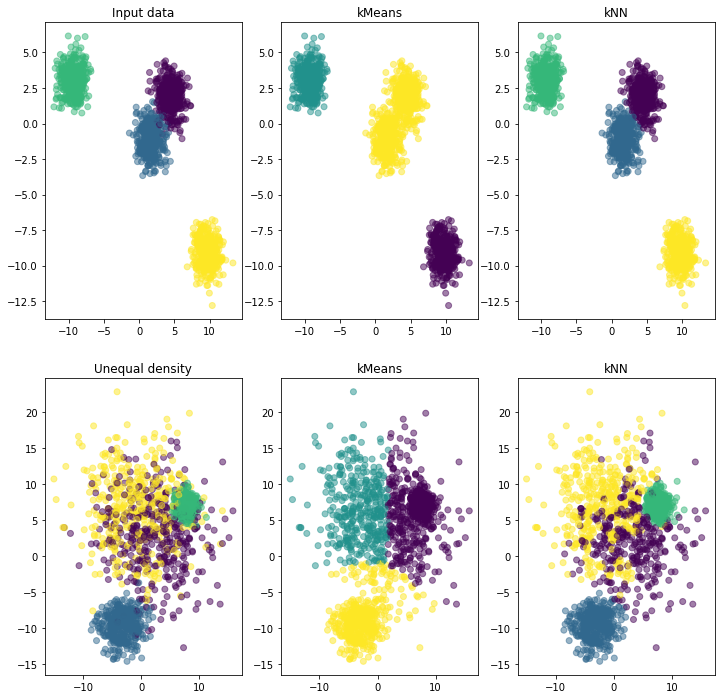

In [5]:
# kMeans and kNN on articial data
# Adapted from sklearn examples

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
n_blobs=4
X, y = make_blobs(
    n_samples=n_samples, 
    centers=n_blobs
)

# Input data
plt.subplot(231)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.title("Input data")


# Clustering
y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.subplot(232)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.title("kMeans")


# Classification
y_pred = KNeighborsClassifier(n_neighbors=5).fit(X, y).predict(X)
print(f"kNN score (uniform density): {KNeighborsClassifier(n_neighbors=5).fit(X, y).score(X,y):.3f}")

plt.subplot(233)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.title("kNN")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, 
    centers=n_blobs,
    cluster_std=np.random.choice( # randomize variance of each cluster
        [1.0, 5.0, 2.0], 
        size=n_blobs, 
        replace=True
    )
)

plt.subplot(234)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied, alpha=0.5)
plt.title("Unequal density")

y_pred = KMeans(n_clusters=3).fit_predict(X_varied)

plt.subplot(235)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, alpha=0.5)
plt.title("kMeans")

y_pred = KNeighborsClassifier(n_neighbors=5).fit(X_varied, y_varied).predict(X_varied)
print(f"kNN score (varied density): {KNeighborsClassifier(n_neighbors=5).fit(X_varied, y_varied).score(X_varied, y_varied):.3f}")

plt.subplot(236)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, alpha=0.5)
plt.title("kNN")


plt.show()

**NB.** The classifier performance above is artificially good, because we've trained on the full data set, then tested over the same data set. This isn't how you'd evaluate real-world performance! Cf. test-train split (or dev-test-train split) and cross validation (repeated, different splits).


### Classification boundaries (a.k.a. decision boundaries)

<img src="./images/svm.svg" width="300px">

### Decision tree
* Select features that best split the training data, in descending order
* Need a measure of the empirical quality of the split imposed by a given partition 
    * We are trying to reduce entropy, that is, the mixing of the classes that would follow from splitting at a given value of a feature
    * Mutual information (recall HDA, ch. 5) is a typical metric to select the most informative features
* Highly interpretable
* Prone to **overfitting**

<img src="./images/Decision_Tree.jpg">

Theft in Old Bailey cases:
<img src="./images/example_tree.png">

### Random forest
* Create many different decision trees trained on different subsets of your data
* Class label by majority vote of the different trees
* Improves overfitting of single decision trees, at the cost of interpretability

### Logistic regression
* Begin with the intuition that the value of each feature measured for each object pushes us (and our classifier) toward the belief that the object belongs to one category or another.
    * Features may be in conflict, in the sense that an object may have some features that are associated with one class and others that are associated with another class.
    * We want to assign an object to the category that best aligns with its features overall.
* Fit training data to a linear model: $z = W_0 + W_1 x_1 + W_2 x_2 + ...$
    * Note that values of $z$ can range from -infinity to + infinity
    * This linear function summarizes our evidence
    * More positive values suggest membership in one class; more negative values suggest membership in the other class
* Transform the linear value into a score between 0 and 1 using the sigmoid function: $$\sigma(t) = \frac{1}{1 + e^{-z}}$$
    * This alows us to transform the infinite range of evidentiary values from the linear model into a value that ranges from zero to one and that we can interpret as a probability of membership in the target class.
* Sigmoid function looks like this:
    
<img src="./images/sigmoid.png">

### Naïve Bayes
* Covered in HDA, ch. 6
* Bayes' Rule: $p(C|x_1 , ..., x_n) = p(C)\prod_{i=1}^{n} p(x_i | C)$
* Read: "The probability of class $C$ given the values in vector $x$ equals the underlying probability of class $C$ times the probabilities of those feature values given class $C$."
* This allows you to transform a difficult (or impossible) measurement, the probability of class membership given observed evidence, into an easy (or easier) one that involves the probability of seeing certain evidence given class membership.
* $x_i$ is the value of feature $i$ in the vector $x$
* The latter part -- the underlying proabability of class $C$ and the probability of the feature values given class $C$ -- is what you learn from your training data.
* You can then assign class labels in your test set on the basis of the class with the highest predicted probability given the evidence.
* Note difference between Bernoulli, Gaussian, and multinomial NB (each of which is adifferent classifier type in `sklearn`): 
    * Bernoulli NB is for use with binary features (encoding the presence or absence of a word type in a document, for example). You would use this if you binarized your features at vectorization.
    * Multinomial NB is for features that take integer values, such as ordinary word count.
    * Gaussian NB is for use with continuous variables, including TF-IDF weighted and/or normalized word counts.
    * `sklearn` will often take care of reformatting your data for use with the NB classifier you select, but it may not result in the treatment you intended.

### SVM
* A linear (by default) method based on finding the line or plane that separates classes with maximum margin.
    * Think of this as a line of "worst fit," in contrast to the line of best fit for a regression model.
    * The *support vectors* are the objects closest to the decision boundary, i.e., those that would *change* the boundary if they were removed.
* Can be extended to nonlinear hyperplanes via kernel functions.
    * A kernel function maps input points to a higher-dimensional space in which the inputs *are* linearly separable.
* A classic approach to text classification (developed in the 1990s, in part by Thorsten Joachims here at Cornell; underpinnings extend back to the 1960s).